<a href="https://colab.research.google.com/github/WilliamMejiaG/Class_Notes_Differential_Equations/blob/main/STABILITY_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! sudo apt-get install texlive-latex-recommended 
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
! unzip type1cm.zip -d /tmp/type1cm 
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
! sudo texhash

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-d

In [ ]:
!apt install cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cm-super-minimal pfb2t1c2pfb
The following NEW packages will be installed:
  cm-super cm-super-minimal pfb2t1c2pfb
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 24.5 MB of archives.
After this operation, 59.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 cm-super-minimal all 0.3.4-11 [5,810 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 pfb2t1c2pfb amd64 0.3-11 [9,342 B]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 cm-super all 0.3.4-11 [18.7 MB]
Fetched 24.5 MB in 2s (14.0 MB/s)
Selecting previously unselected package cm-super-minimal.
(Reading database ... 186568 files and directories

In [ ]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from scipy.integrate import odeint

In [ ]:
#Arguments
t0 = 0
h = 1.0e-2
tend = 5
S_values = np.arange(0.0,2.25,0.25, dtype=float)
#vectorizing the color map
vcolors = plt.cm.viridis_r(np.linspace(0,0.5, len(S_values)))  # colors      for each trajectory

#Function to process
def S(X,t):
  S = np.zeros_like(X)
  
  x = X[0]
  y = X[1]
  
  S[0] = 2*x + 8*y
  S[1] = -x - 2*y
  
  return S

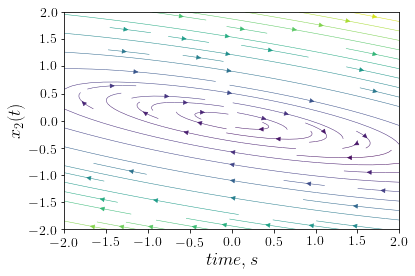

In [ ]:
#STREAM PLOT
X,Y = np.meshgrid(np.linspace(-2,2,10),np.linspace(-2,2,10))
U,V = 2*X + 8*Y,-X - 2*Y
n = -2
color_array = np.sqrt(((U-n)/2)**2 + ((V-n)/2)**2)
plt.streamplot(X, Y, U, V ,color= color_array, linewidth=0.5, density= 0.80)
#plt.axis('square')
plt.xlabel(r'$time,s$', fontsize = 18)
plt.ylabel(r'$x_{2}(t)$',fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.axis([-2, 2, -2, 2])
plt.show()

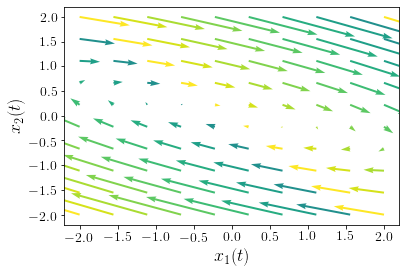

In [ ]:
#VECTOR MAP
X,Y = np.meshgrid(np.linspace(-2,2,10),np.linspace(-2,2,10))
U,V = 2*X + 8*Y,-X - 2*Y
plt.quiver(X, Y, U, V ,color = vcolors,scale=80,linewidth=0.05)
plt.xlabel(r'$x_{1}(t)$', fontsize = 18)
plt.ylabel(r'$x_{2}(t)$',fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

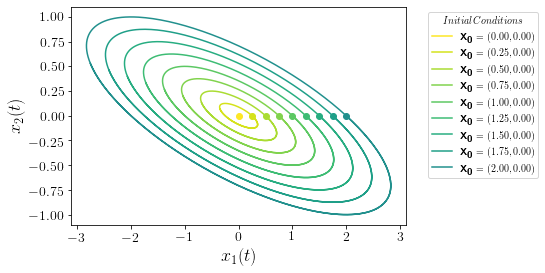

In [ ]:


#PHASE PORTRAIT
for i,ic in enumerate(S_values):
  t = np.arange(t0,tend,h,dtype=float)
  S0 = [ic,0]
  sol = odeint(S,S0,t) 

  plt.plot(sol[:,0],sol[:,1], color = vcolors[i],label= r'$\textbf{X}_\textbf{0}=(%.2f,0.00)$' % S_values[i])
  plt.plot([sol[0,0]],[sol[0,1]],'o',color=vcolors[i])
  plt.legend(title=r'$Initial Conditions$', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel(r'$x_{1}(t)$', fontsize = 18)
plt.ylabel(r'$x_{2}(t)$',fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()


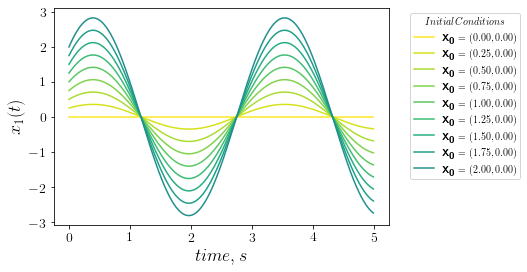

In [ ]:
#GRAPHIC 1 IN FUNCTION OF TIME
for i,ic in enumerate(S_values):
  t = np.arange(t0,tend,h,dtype=float)
  S0 = [ic,0]
  sol = odeint(S,S0,t)

  plt.plot(t,sol[:,0],color = vcolors[i],label= r'$\textbf{X}_\textbf{0}=(%.2f,0.00)$' % S_values[i])
  plt.legend(title= r'$Initial Conditions$', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel(r'$time,s$', fontsize = 18)
plt.ylabel(r'$x_{1}(t)$',fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

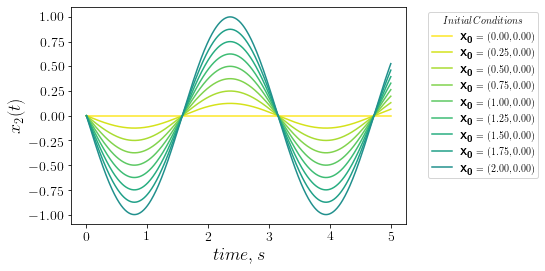

In [ ]:
#GRAPHIC 2 IN FUNCTION OF TIME  
for i,ic in enumerate(S_values):
  t = np.arange(t0,tend,h,dtype=float)
  S0 = [ic,0]
  sol = odeint(S,S0,t)

  plt.plot(t,sol[:,1],color = vcolors[i],label=r'$\textbf{X}_\textbf{0}=(%.2f,0.00)$' % S_values[i])
  plt.legend(title= r'$Initial Conditions$', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel(r'$time,s$', fontsize = 18)
plt.ylabel(r'$x_{2}(t)$',fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()